In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load dataset
df = pd.read_csv("student_exam.csv")

# Extract features (X) and target labels (y)
X = df["study_hours"].values.reshape(-1, 1)  # Convert to 2D array
y = df["pass_exam"].values  # 0 = Fail, 1 = Pass

# Add bias term (column of 1s)
X = np.c_[np.ones(X.shape[0]), X]

# Split data into 80% training and 20% testing
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Print dataset sizes
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 8
Testing set size: 2


In [4]:
# Sigmoid function (converts numbers into probabilities)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Test sigmoid function
print("Sigmoid(0):", sigmoid(0))  # Expected: 0.5


Sigmoid(0): 0.5


In [5]:
# Cost function (Binary Cross-Entropy)
def compute_cost(X, y, weights):
    m = len(y)
    z = np.dot(X, weights)  
    predictions = sigmoid(z)
    
    # Binary Cross-Entropy Loss
    cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Initialize weights
weights = np.zeros(X_train.shape[1])

# Compute initial cost
initial_cost = compute_cost(X_train, y_train, weights)
print("Initial Cost:", initial_cost)  # Should be a positive number


Initial Cost: 0.6931471805599453


In [6]:
# Gradient Descent Algorithm
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)def compute_cost(X, y, weights):
  
    
    for i in range(iterations):
        z = np.dot(X, weights)
        predictions = sigmoid(z)

        # Compute gradient
        gradient = np.dot(X.T, (predictions - y)) / m

        # Update weights
        weights -= learning_rate * gradient

        # Print cost every 100 iterations
        if i % 100 == 0:
            cost = compute_cost(X, y, weights)
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return weights

# Train the model
learning_rate = 0.1
iterations = 1000
weights = gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), learning_rate, iterations)

print("Final Weights:", weights)


Iteration 0, Cost: 0.6245
Iteration 100, Cost: 0.4068
Iteration 200, Cost: 0.3137
Iteration 300, Cost: 0.2627
Iteration 400, Cost: 0.2304
Iteration 500, Cost: 0.2078
Iteration 600, Cost: 0.1911
Iteration 700, Cost: 0.1780
Iteration 800, Cost: 0.1674
Iteration 900, Cost: 0.1586
Final Weights: [-5.67648623  1.32236696]


In [7]:
# Function to make predictions
def predict(X, weights):
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= 0.5).astype(int)

# Test the model on new data
y_pred = predict(X_test, weights)

# Print actual vs predicted values
print("Actual:", y_test)
print("Predicted:", y_pred)


Actual: [1 1]
Predicted: [1 1]


In [8]:
# Calculate accuracy
accuracy = np.mean(y_pred == y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 100.00%


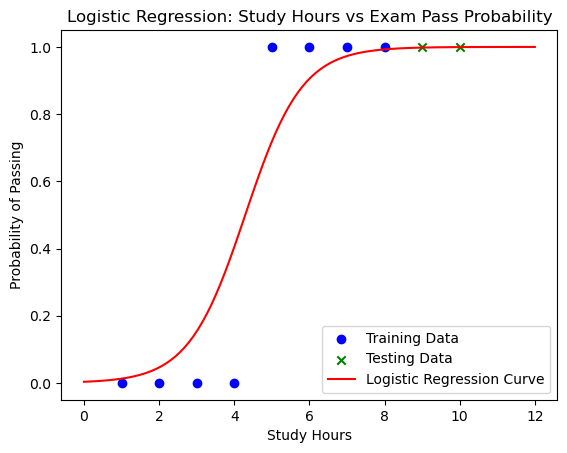

In [9]:
# Generate values for sigmoid curve
X_range = np.linspace(0, 12, 100).reshape(-1, 1)
X_range_bias = np.c_[np.ones(X_range.shape[0]), X_range]
y_prob = sigmoid(np.dot(X_range_bias, weights))

# Plot actual data points
plt.scatter(X_train[:, 1], y_train, color='blue', label="Training Data")
plt.scatter(X_test[:, 1], y_test, color='green', marker="x", label="Testing Data")

# Plot sigmoid curve
plt.plot(X_range, y_prob, color='red', label="Logistic Regression Curve")

# Labels and title
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression: Study Hours vs Exam Pass Probability")

# Show plot
plt.legend()
plt.show()


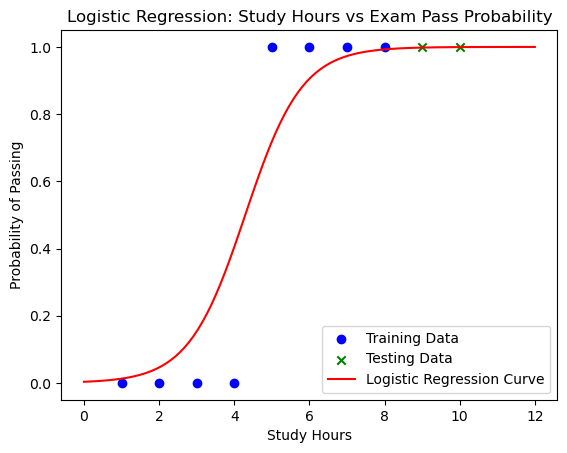

In [9]:
# Generate values for sigmoid curve
X_range = np.linspace(0, 12, 100).reshape(-1, 1)
X_range_bias = np.c_[np.ones(X_range.shape[0]), X_range]
y_prob = sigmoid(np.dot(X_range_bias, weights))

# Plot actual data points
plt.scatter(X_train[:, 1], y_train, color='blue', label="Training Data")
plt.scatter(X_test[:, 1], y_test, color='green', marker="x", label="Testing Data")

# Plot sigmoid curve
plt.plot(X_range, y_prob, color='red', label="Logistic Regression Curve")

# Labels and title
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression: Study Hours vs Exam Pass Probability")

# Show plot
plt.legend()
plt.show()


In [10]:
# Gradient Descent Algorithm for Logistic Regression
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)  # Number of training examples
    
    for i in range(iterations):
        z = np.dot(X, weights)  # Compute weighted sum
        predictions = sigmoid(z)  # Apply sigmoid function

        # Compute gradient (how much to adjust weights)
        gradient = np.dot(X.T, (predictions - y)) / m

        # Update weights
        weights -= learning_rate * gradient

        # Print cost every 100 iterations
        if i % 100 == 0:
            cost = compute_cost(X, y, weights)
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return weights  # Return optimized weights

# Train the model using Gradient Descent
learning_rate = 0.1  # Step size for updating weights
iterations = 1000  # Number of times to update weights
weights = gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), learning_rate, iterations)

print("Final Weights:", weights)


Iteration 0, Cost: 0.6245
Iteration 100, Cost: 0.4068
Iteration 200, Cost: 0.3137
Iteration 300, Cost: 0.2627
Iteration 400, Cost: 0.2304
Iteration 500, Cost: 0.2078
Iteration 600, Cost: 0.1911
Iteration 700, Cost: 0.1780
Iteration 800, Cost: 0.1674
Iteration 900, Cost: 0.1586
Final Weights: [-5.67648623  1.32236696]
